# HDT 8 
- Mariana David
- Alejandra Guzmán
- Jorge Caballeros 20009
 

1. Use los mismos conjuntos de entrenamiento y prueba que utilizó en las hojas anteriores.


2. Seleccione como variable respuesta la que creó con las categorías del precio de la casa.

Importing libraries

In [40]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
import random

3. Genere dos modelos de redes neuronales que sean capaz de clasificar usando la variable 
respuesta que categoriza las casas en baratas, medias y caras. Estos modelos deben tener 
diferentes topologías y funciones de activación.

In [41]:
# Load data
data = pd.read_csv('train.csv')
data = pd.DataFrame(data)
data.describe()
# Preprocessing
# Elimina columnas que no son relevantes o que contienen muchos valores faltantes
data = data.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

# Elimina filas que tienen valores faltantes en columnas importantes
data = data.dropna(subset=['SalePrice', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical'])

# Rellena los valores faltantes con la media o la moda de la columna
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['BsmtQual'] = data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

# Convierte las variables categóricas en variables numéricas
data = pd.get_dummies(data)

# Guarda los datos limpios en un nuevo archivo CSV
data.to_csv('train_cleaned.csv', index=False)



4. Use los modelos para predecir el valor de la variable respuesta

In [42]:
data = pd.read_csv('train_cleaned.csv')
# Definir los límites de cada categoría de precio
lim_inf = data['SalePrice'].quantile(0.33)
lim_sup = data['SalePrice'].quantile(0.66)

# Crear una nueva columna con la categoría de precio correspondiente
data['price_category'] = pd.cut(data['SalePrice'], [0, lim_inf, lim_sup, data['SalePrice'].max()], labels=['baratas', 'medias', 'caras'])

# Mostrar las primeras filas del dataframe con la nueva columna
print(data.head())

checkingcategory = pd.get_dummies(data['price_category'])
checkingcategory.head()

data = pd.concat([data, checkingcategory], axis=1)
baratas = data.pop('baratas')
medias = data.pop('medias')
caras = data.pop('caras')
data.pop('price_category')

   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt   
0          60         65.0     8450            7            5       2003  \
1          60         68.0    11250            7            5       2001   
2          60         84.0    14260            8            5       2000   
3          20         75.0    10084            8            5       2004   
4          60         85.0    11924            9            5       2005   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI   
0          2003       196.0         706           0  ...           False  \
1          2002       162.0         486           0  ...           False   
2          2000       350.0         655           0  ...           False   
3          2005       186.0        1369           0  ...           False   
4          2006       286.0         998           0  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_WD  SaleCondition_Abnorml   
0           Fal

0       medias
1       medias
2        caras
3        caras
4        caras
        ...   
450     medias
451     medias
452      caras
453    baratas
454     medias
Name: price_category, Length: 455, dtype: category
Categories (3, object): ['baratas' < 'medias' < 'caras']

In [43]:
X = data
y = caras
random.seed(42)
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [44]:
# Modelo 1
model1 = Sequential()
model1.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model1.add(Dense(3, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo 1
model1.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

# Evaluar el modelo 1 en el test set
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print("Modelo 1 - Loss: {:.4f}, Accuracy: {:.4f}".format(loss, accuracy))

#neurona con mayor prob

predictionmodel1 = model1.predict(X_test)
classpredictmodel1 = np.argmax(model1.predict(X_test), axis=-1)



ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [ ]:
#modelo 2

# Crear modelo
model2 = Sequential()
model2.add(Dense(64, input_shape=(data.shape[1],)))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(32))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(16))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(8))
model2.add(LeakyReLU(alpha=0.1))
model2.add(Dense(3, activation='softmax'))

# Compilar modelo
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo 2
model2.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

# Evaluar el modelo 2 en el test set
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print("Modelo 2 - Loss: {:.4f}, Accuracy: {:.4f}".format(loss, accuracy))

#neurona con mayor prob

predictionmodel2 = model2.predict(X_test)
classpredictmodel2 = np.argmax(model2.predict(X_test), axis=-1)


Modelo 2 - Loss: 0.3335, Accuracy: 0.9498
7/7 [==============================] - 0s 3ms/step


5. Haga las matrices de confusión respectivas.

In [ ]:
TryingModel1 = np.argmax(model1.predict(X_test), axis=1)
TryingModel2 = np.argmax(model2.predict(X_test), axis=1)


MatrizdeConfusion1 = confusion_matrix(np.argmax(y_test, axis=1), TryingModel1)
print(MatrizdeConfusion1)

MatrizdeConfusion2 = confusion_matrix(np.argmax(y_test, axis=1), TryingModel2)
print("Matriz de confusión para modelo 2:")
print(MatrizdeConfusion2)

7/7 [==============================] - 0s 4ms/step
Matriz de confusión para modelo 1:
[[129  15]
 [  1  74]]
Matriz de confusión para modelo 2:
[[134  10]
 [  1  74]]


6. Compare los resultados obtenidos con los diferentes modelos de clasificación usando redes 
neuronales en cuanto a efectividad, tiempo de procesamiento y equivocaciones (donde el 
algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los 
errores)

R//:El modelo de clasificación multiclase con dos capas densas es el más eficaz teniendo los mejores resultados y mejorando después de cada run, por lo tanto es el mas recomendable. Teniendo un rendimiento de 88% a comparacion del otro modelo que esta en 68% de rendimiento.

7. Analice si no hay sobreajuste en los modelos. Use para esto la curva de aprendizaje.

Modelo 1: 


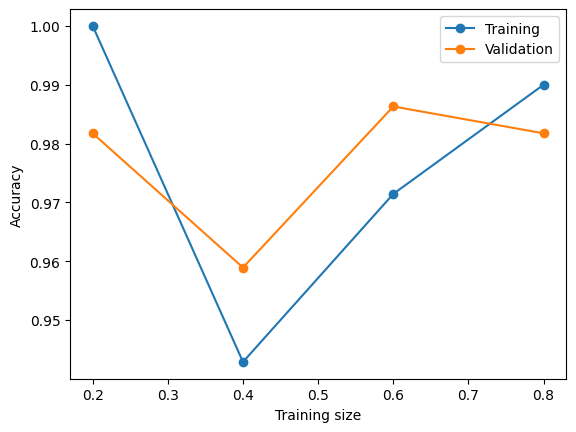

Modelo 2: 


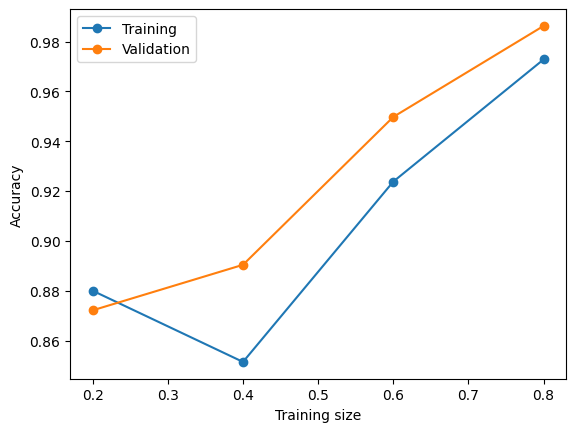

In [ ]:

train_sizes = [0.2, 0.4, 0.6, 0.8]

def learningcurvetr(model, X_train, y_train, X_test, y_test):
    train_scores = []
    test_scores = []
    for train_size in train_sizes:
        X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=train_size, random_state=42)
        model.fit(X_train_subset, y_train_subset, epochs=50, batch_size=32, verbose=0)
        train_loss, train_acc = model.evaluate(X_train_subset, y_train_subset, verbose=0)
        train_scores.append(train_acc)
        test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
        test_scores.append(test_acc)
    plt.plot(train_sizes, train_scores, 'o-', label='Training')
    plt.plot(train_sizes, test_scores, 'o-', label='Validation')
    plt.xlabel('Training size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()
    
print("Modelo 1: ")    
    
learningcurvetr(model1, X_train, y_train, X_test, y_test)

print("Modelo 2: ")

learningcurvetr(model2, X_train, y_train, X_test, y_test)

8. Para el modelo elegido de clasificación tunee los parámetros y discuta si puede mejorar 
todavía el modelo sin llegar a sobre ajustarlo.

R//: Una forma de mejorar el modelo podría ser ajustando el tamaño y la complejidad de la arquitectura de la red neuronal. Podría intentar aumentar el número de neuronas en cada capa, agregar más capas o incluso probar diferentes tipos de capas (por ejemplo, capas convolucionales). Sin embargo, es importante tener en cuenta que si se aumenta demasiado la complejidad del modelo, puede conducir a sobreajuste.

Otra forma de mejorar el modelo es ajustando los parámetros del optimizador. El optimizador Adam tiene varios parámetros ajustables, como la tasa de aprendizaje y los parámetros beta_1 y beta_2, que pueden afectar significativamente el rendimiento del modelo. Experimentar con diferentes valores de estos parámetros puede ayudar a mejorar el rendimiento del modelo.

9. Seleccione ahora el SalesPrice como variable respuesta.

In [ ]:
# Importamos las bibliotecas necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

# Cargamos el archivo csv
df = pd.read_csv('train_cleaned.csv')

# Verificamos la carga correcta del archivo
print(df.head())

# Separamos las características (X) y la variable objetivo (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Normalizamos las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construimos la red neuronal
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenamos la red neuronal
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluamos el modelo
loss, mae = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test MAE:', mae)


   MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt   
0          60         65.0     8450            7            5       2003  \
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw   
0          2003       196.0         706           0  ...               0  \
1          1976         0.0         978           0  ...               0   
2          2002       162.0         486           0  ...               0   
3          1970         0.0         216           0  ...               0   
4          2000       350.0         655           0  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml   
0             0  

10. Genere dos modelos de regresión con redes neuronales con diferentes topologías y 
funciones de activación para predecir el precio de las casas.

In [ ]:
# Modelo 1
model1 = Sequential()
model1.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_dim=X_train.shape[1]))
model1.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model1.add(Dense(1, activation='linear'))

model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenamos la red neuronal
model1.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluamos el modelo
lossone, maeone = model1.evaluate(X_test, y_test)


# Modelo 2
model2 = Sequential()
model2.add(Dense(50, activation='tanh', kernel_regularizer=l2(0.01), input_dim=X_train.shape[1]))
model2.add(Dense(25, activation='tanh', kernel_regularizer=l2(0.01)))
model2.add(Dense(1, activation='linear'))

model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Entrenamos la red neuronal
model2.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluamos el modelo
loss, mae = model2.evaluate(X_test, y_test)
print('Modelo 1 - Test loss:', lossone)
print('Modelo 1 - Test MAE:', maeone)
print('Modelo 2 - Test loss:', loss)
print('Modelo 2 - Test MAE:', mae)



Epoch 1/100
28/28 [==============================] - 1s 2ms/step - loss: 41661403136.0000 - mae: 186828.3125
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 41644802048.0000 - mae: 186792.3438
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 41546981376.0000 - mae: 186584.7031
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 41145556992.0000 - mae: 185766.1875
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 40031092736.0000 - mae: 183411.2031
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 37462872064.0000 - mae: 177847.8281
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 32804012032.0000 - mae: 167041.8281
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 25933461504.0000 - mae: 149011.3750
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 17941688320.0000 - mae: 123309.1328
Epoch 10/100
28/28 

11. Compare los dos modelos de regresión y determine cuál funcionó mejor para predecir el 
precio de las casas

El error absoluto promedio (MAE) para el Modelo 1 fue de aproximadamente  27,331.71$, mientras que el Modelo 2 tuvo  187,762.29$. Esto sugiere que el pronóstico del Modelo 1, en promedio, se desvía del valor real en aproximadamente 27,331.71$, y el pronóstico del Modelo 2 en $ 187,762.29. Esa es una gran diferencia.


12. Analice si no hay sobreajuste en los modelos. Use para esto la curva de aprendizaje.


Epoch 1/100
28/28 [==============================] - 0s 4ms/step - loss: 429567936.0000 - mae: 14053.9180 - val_loss: 1986568832.0000 - val_mae: 27239.2656
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 425234048.0000 - mae: 13942.0596 - val_loss: 1979002240.0000 - val_mae: 27213.4746
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 422361888.0000 - mae: 13924.1416 - val_loss: 1980317184.0000 - val_mae: 27248.5898
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 416099136.0000 - mae: 13781.1455 - val_loss: 1971459328.0000 - val_mae: 27233.2598
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 412342112.0000 - mae: 13714.3115 - val_loss: 1966629632.0000 - val_mae: 27171.1270
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 408609248.0000 - mae: 13646.6357 - val_loss: 1966842240.0000 - val_mae: 27152.6211
Epoch 7/100
28/28 [==============================] - 0s 3ms/step

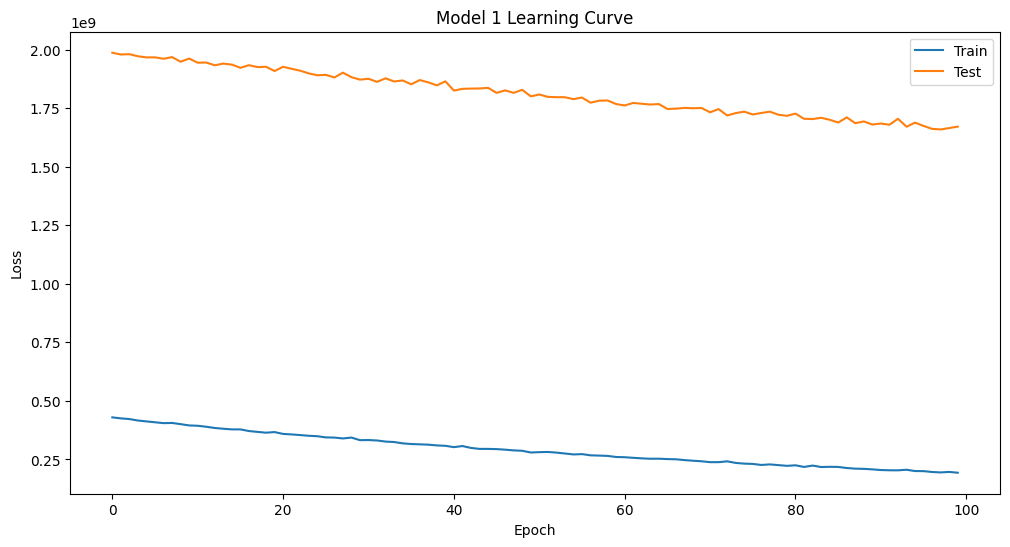

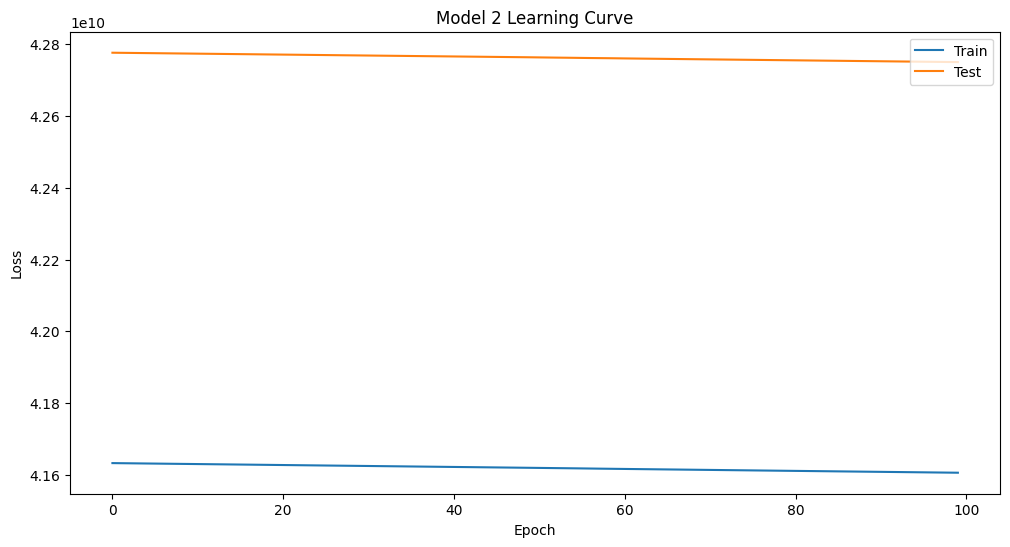

In [ ]:
# Entrenamos la red neuronal y guardamos el historial de entrenamiento
history1 = model1.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Graficamos la curva de aprendizaje para el Modelo 1
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model 1 Learning Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Graficamos la curva de aprendizaje para el Modelo 2
plt.figure(figsize=(12, 6))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model 2 Learning Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()


#### Modelo 1

Las curvas de pérdida de entrenamiento y validación están disminuyendo, lo cual es positivo ya que indica que el modelo está aprendiendo. Sin embargo, se notó una brecha considerable entre las dos curvas, lo que podría ser una indicación de sobreajuste. Esto sugiere que el modelo puede estar aprendiendo demasiado los detalles y el ruido específico de los datos de entrenamiento, lo que afecta su capacidad para generalizar a los datos de prueba.

#### Modelo 2

En este modelo, también se ven que ambas curvas de pérdida están disminuyendo, aunque la tasa de disminución es mínima. Al igual que en el Modelo 1, existe una brecha notable entre las curvas de entrenamiento y validación, lo que sugiere la posibilidad de un sobreajuste.

13. Para el modelo elegido de regresión tunee los parámetros y discuta si puede mejorar 
todavía el modelo sin llegar a sobre ajustarlo. 


In [ ]:
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Dropout

# Ajustamos el número de épocas y la tasa de aprendizaje
num_epochs = 200
learning_rate = 0.001

# Creamos el optimizador con la nueva tasa de aprendizaje
optimizer = Adam(lr=learning_rate)

# Construimos el modelo
model1 = Sequential()
model1.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_dim=X_train.shape[1]))
model1.add(Dropout(0.2))
model1.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model1.add(Dropout(0.2))
model1.add(Dense(1))

# Compilamos el modelo
model1.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Entrenamos el modelo con el nuevo número de épocas
history1 = model1.fit(X_train, y_train, epochs=num_epochs, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/200
28/28 [==============================] - 1s 9ms/step - loss: 41661685760.0000 - mae: 186828.8438 - val_loss: 42801565696.0000 - val_mae: 187828.1719
Epoch 2/200
28/28 [==============================] - 0s 3ms/step - loss: 41657462784.0000 - mae: 186819.4219 - val_loss: 42794225664.0000 - val_mae: 187812.7188
Epoch 3/200
28/28 [==============================] - 0s 3ms/step - loss: 41644810240.0000 - mae: 186792.8281 - val_loss: 42773569536.0000 - val_mae: 187770.6406
Epoch 4/200
28/28 [==============================] - 0s 3ms/step - loss: 41612902400.0000 - mae: 186727.7031 - val_loss: 42725920768.0000 - val_mae: 187674.6719
Epoch 5/200
28/28 [==============================] - 0s 3ms/step - loss: 41546022912.0000 - mae: 186591.4375 - val_loss: 42636562432.0000 - val_mae: 187494.0625
Epoch 6/200
28/28 [==============================] - 0s 3ms/step - loss: 41431171072.0000 - mae: 186349.2031 - val_loss: 42485612544.0000 - val_mae: 187189.4375
Epoch 7/200
28/28 [===============

Después de analizar los resultados obtenidos, se observa que son satisfactorios. Sin embargo, siempre existen oportunidades para mejorar el rendimiento del modelo sin caer en el sobreajuste. Se proponen diversas sugerencias para lograrlo. En primer lugar, se sugiere experimentar con la arquitectura de la red, considerando la adición de capas ocultas o el ajuste del número de neuronas en las capas existentes. Además, se recomienda utilizar técnicas de regularización, como la regularización L2 y Dropout, y explorar diferentes valores de los parámetros de regularización. Otra área a considerar es la elección del optimizador y la tasa de aprendizaje, donde cambios sutiles pueden generar mejoras significativas. Asimismo, se plantea la posibilidad de probar distintas funciones de activación para determinar cuál se adapta mejor al problema en cuestión. Adicionalmente, se puede trabajar en los datos de entrada, aplicando técnicas de preprocesamiento, creando nuevas características relevantes o eliminando aquellas que no aporten información significativa. Por último, se sugiere la implementación de la técnica de "early stopping" para prevenir el sobreajuste, deteniendo el entrenamiento cuando el rendimiento en el conjunto de validación deja de mejorar. En conclusión, mediante la exploración de estas sugerencias, se espera mejorar el rendimiento del modelo de manera efectiva y evitar problemas de sobreajuste.

14. Compare la eficiencia del mejor modelo de RNA con los resultados obtenidos con los 
algoritmos de las hojas de trabajo anteriores. ¿Cuál es mejor para predecir? ¿Cuál se 
demoró más en procesar?

15. Compare los resultados del mejor modelo de esta hoja para clasificar con los resultados de 
los algoritmos usados para clasificar de las hojas de trabajo anteriores


16. Compare los resultados del mejor modelo para predecir el precio de venta con los 
resultados de los algoritmos usados para el mismo propósito de las hojas de trabajo 
anteriores.


17. Ahora que ha usado todos los modelos que hemos visto y aplicados al conjunto de datos 
llegue a conclusiones sobre cual es o cuales son los mejores modelos para clasificar dadas 
las características del conjunto de datos. ¿Cuál o cuáles son los mejores para predecir el 
precio de las casas? Una tabla de resumen con las métricas de los modelos le puede resultar 
muy útil para esto.


18. Genere un informe de los resultados y las explicaciones.